In [11]:
#|default_exp lenet 

In [ ]:
#|export
import torch
import torch.nn as nn

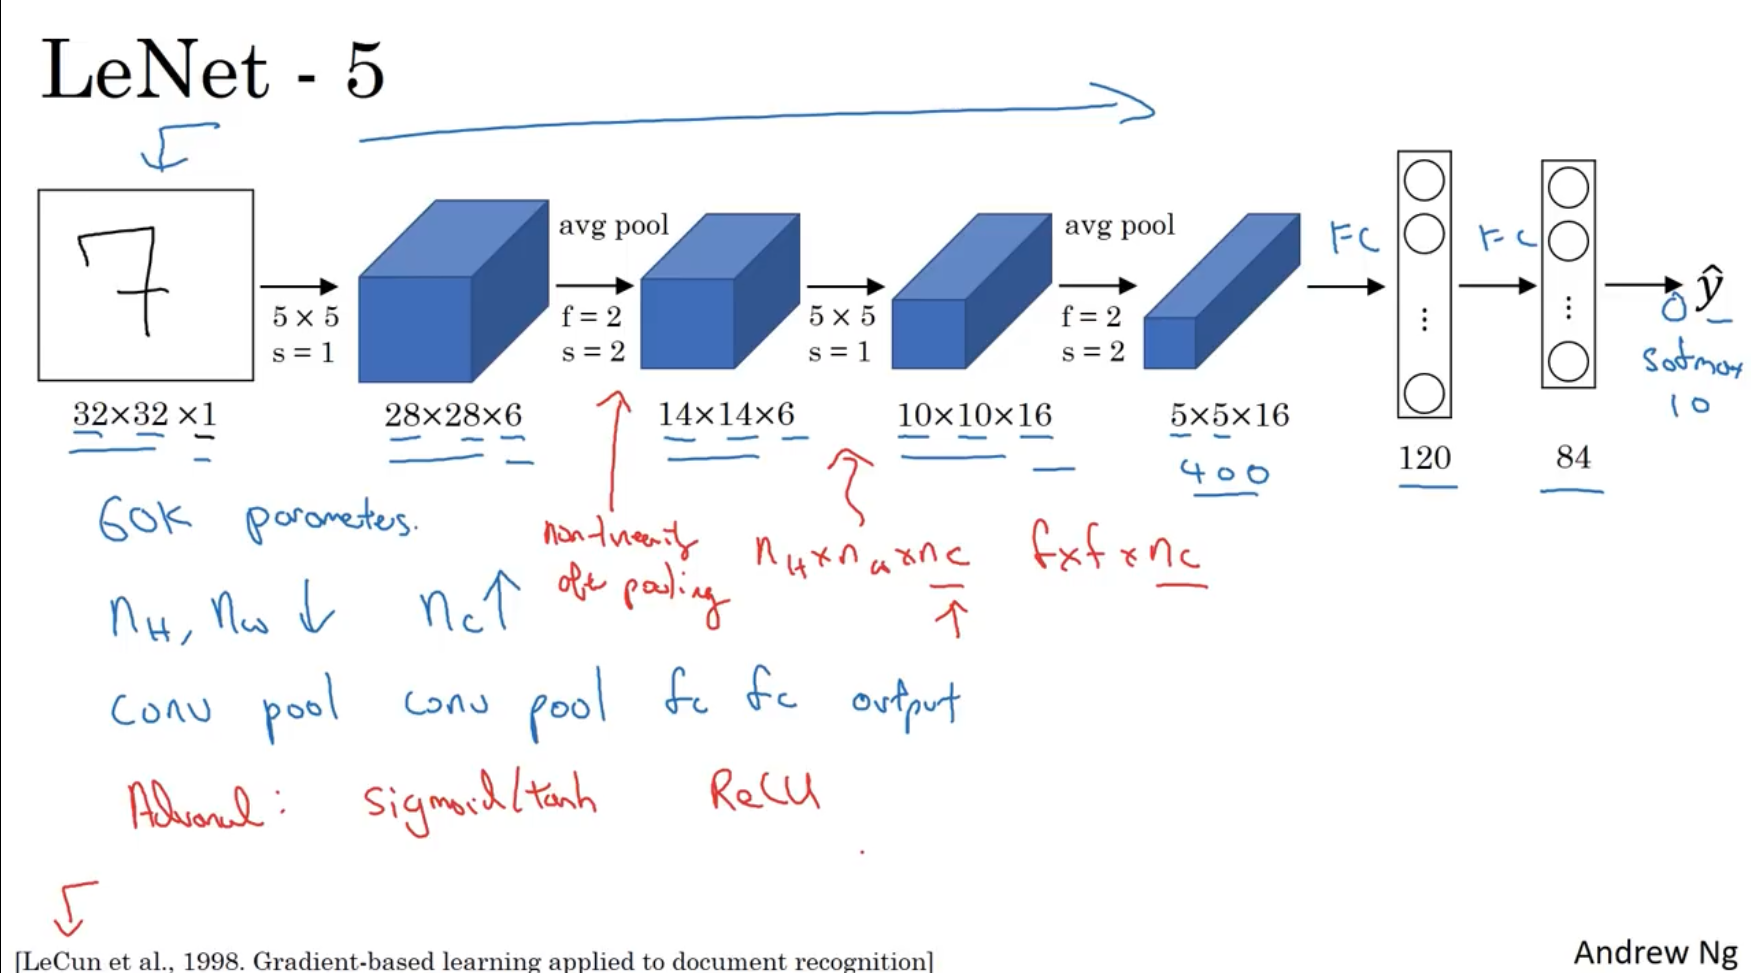

In [15]:
#|export

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        
        # 32 x 32 x 1
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1)
        # 28 x 28 x 6
        self.avg_pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        # 14 x 14 x 6
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        # 10 x 10 x 16
        self.avg_pool2= nn.AvgPool2d(kernel_size=2, stride=2)
        # 5 x 5 x 16
        self.fc1 = nn.Linear(400,120)
        # 1 x 120
        self.fc2 = nn.Linear(120,84)
        # 1 x 84
        self.fc3 = nn.Linear(84,10)
        # 1 x 10


    def forward(self, X):
        X = self.conv1(X)
        X = self.relu(X)
        X = self.avg_pool1(X)

        X = self.conv2(X)
        X = self.relu(X)
        X = self.avg_pool2(X)

        X = torch.flatten(X, 1)
        
        X = self.fc1(X)
        X = self.relu(X)

        X = self.fc2(X)
        X = self.relu(X)

        X = self.fc3(X)

        return X

In [28]:
#|export

import torchvision
import torchvision.transforms as transforms
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt

train_transforms = transforms.Compose(
    [
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)
test_transforms = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

train_data = torchvision.datasets.CIFAR10(root="../data", train=True, transform=train_transforms, download=True)
test_data = torchvision.datasets.CIFAR10(root="../data", train=False, transform=test_transforms, download=True)

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


def train(model, optimizer, data, loss_func):
    model.train()
    running_loss = 0.0
    for X, y in data:
        pred = model(X)
        loss = loss_func(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
    
    print(f"train loss: {running_loss/len(data.dataset):0.5f}")


    return running_loss

def test(model, data, loss_func):
    model.eval()
    running_loss = 0.0
    correct = 0
    for X, y in data:
        with torch.no_grad():
            pred = model(X)
            loss = loss_func(pred, y)
            correct += (pred.argmax(1) == y).sum().item()
            running_loss += loss.item()
    print(f"test loss: {running_loss/len(data.dataset):.5f}, accuracy: {correct/len(data.dataset)* 100:.2f}%")
    return running_loss

epoch = 20
model = LeNet()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())


train_losses = []
test_losses = []
for i in range(epoch):
    print(f"==== EPOCH {i} =====")
    train_loss = train(model, optimizer, train_dataloader, loss_func)
    test_loss = test(model, test_dataloader, loss_func)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

plt.plot(train_losses)
plt.plot(test_losses)

==== EPOCH 0 =====
train loss: 0.03068
test loss: 0.02656, accuracy: 37.28%
==== EPOCH 1 =====


KeyboardInterrupt: 

In [29]:
from nbdev.export import nb_export 

nb_export('lenet.ipynb', '../src/')